# Getting started

The main interface to PySM is the `pysm.Sky` class, the simplest way is to specify the required resolution as $N_{side}$ *HEALPix* parameter and the requested models as a list of strings, for example the simplest models for galactic dust and synchrotron `["d1", "s1"]`

In [1]:
import pysm
import pysm.units as u
import healpy as hp
import numpy as np

In [2]:
sky = pysm.Sky(nside=128, preset_strings=["d1", "s1"])

PySM initializes the requested component objects (generally load the input templates maps with `astropy.utils.data` and cache them locally in `~/.astropy`) and stores them in the `components` attribute (a list):

In [3]:
sky.components

PySM 3 uses `astropy.units`: http://docs.astropy.org/en/stable/units/ each input needs to have a unit attached to it, the unit just needs to be compatible, e.g. you can use either `u.GHz` or `u.MHz`.

In [4]:
map_100GHz = sky.get_emission(100 * u.GHz)

The output of the `get_emission` method is a 2D `numpy` array in the usual `healpy` convention, `[I,Q,U]`, by default in $\mu K_{RJ}$:

In [5]:
map_100GHz[0, :3] 

<Quantity [1.8686613, 1.9287539, 2.237162 ] uK_RJ>

Optionally convert to another unit using `astropy.units`

In [6]:
map_100GHz = map_100GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(100*u.GHz))

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

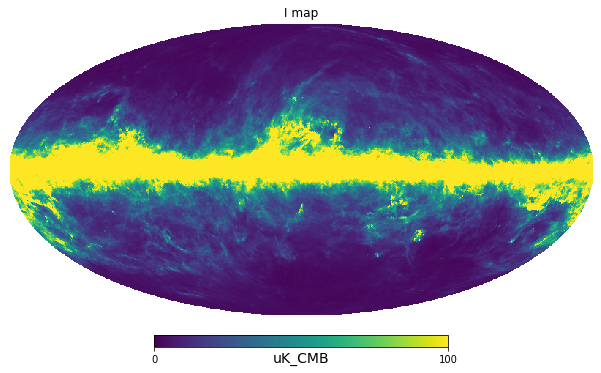

In [8]:
hp.mollview(map_100GHz[0], min=0, max=1e2, title="I map", unit=map_100GHz.unit)

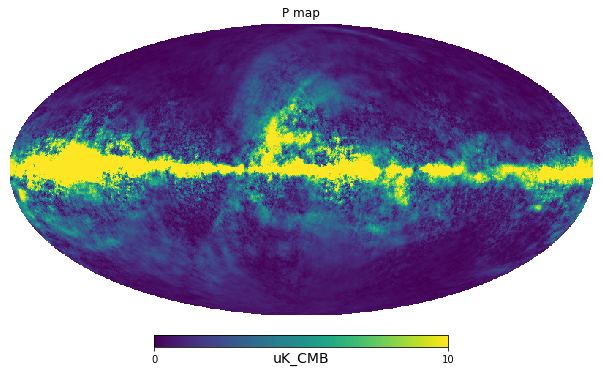

In [9]:
hp.mollview(np.sqrt(map_100GHz[1]**2 + map_100GHz[2]**2), title="P map", min=0, max=1e1, unit=map_100GHz.unit)